# Coronavirus DataSet of patients

## Predection of COVID-19 with the help of provided dataset

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [72]:
dataFrame = pd.read_csv('patient.csv')

In [73]:
dataFrame.describe()

,id,birth_year,infection_order,infected_by,contact_number
count,4812.000000,299.000000,35.000000,62.000000,32.000000
mean,2406.500000,1972.712375,2.257143,330.741935,96.843750
std,1389.249078,17.589967,1.357828,458.786744,224.669522
min,1.000000,1934.000000,1.000000,3.000000,0.000000
25%,1203.750000,1959.000000,1.000000,29.250000,2.750000
50%,2406.500000,1971.000000,2.000000,126.000000,16.500000
75%,3609.250000,1987.000000,3.000000,372.000000,69.750000
max,4812.000000,2018.000000,6.000000,1768.000000,1160.000000


In [74]:
dataFrame

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,4808,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4808,4809,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4809,4810,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4810,4811,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated


In [5]:
# Mean birth_year = 1972 age = 48 Years Old
# 75% = 1987 = 33 Years Old

contact with patient                 66
visit to Daegu                       40
visit to Wuhan                        8
pilgrimage to Israel                  6
residence in Wuhan                    2
contact with patient in Singapore     2
visit to Thailand                     2
contact with patient in Japan         1
visit to Cheongdo Daenam Hospital     1
visit to Vietnam                      1
visit to China                        1
Name: infection_reason, dtype: int64
-------------------
count    11.000000
mean     11.818182
std      21.297034
min       1.000000
25%       1.000000
50%       2.000000
75%       7.000000
max      66.000000
Name: infection_reason, dtype: float64


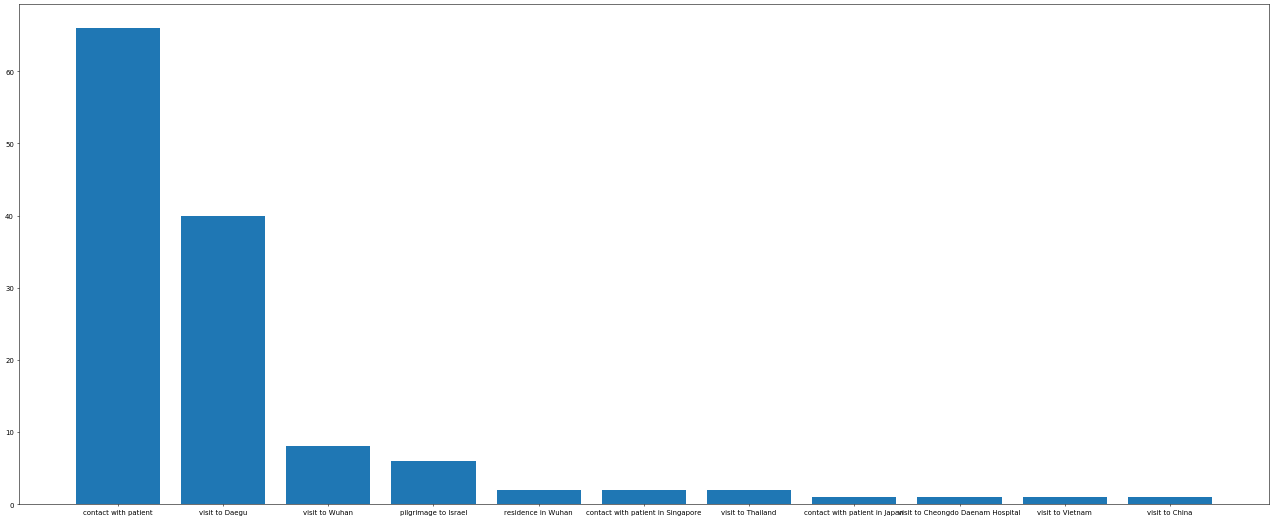

In [7]:
infection_reason=dataFrame['infection_reason'].value_counts()
print(infection_reason)
print('-------------------')
print(infection_reason.describe())
fig = plt.figure(figsize=(25, 10),dpi=50)
ax = fig.add_axes([0,0,1,1])
ax.bar(infection_reason.keys().to_list(),infection_reason.to_list())
plt.show()

Gyeongsangbuk-do       120
capital area           110
Daegu                   39
Gwangju                 10
Daejeon                 10
Gangwon-do               5
filtered at airport      4
Jeollabuk-do             4
Chungcheongbuk-do        2
Chungcheongnam-do        2
Jeju-do                  2
Ulsan                    2
Busan                    2
Dague                    1
Name: region, dtype: int64
-------------------
count     14.000000
mean      22.357143
std       40.479068
min        1.000000
25%        2.000000
50%        4.000000
75%       10.000000
max      120.000000
Name: region, dtype: float64


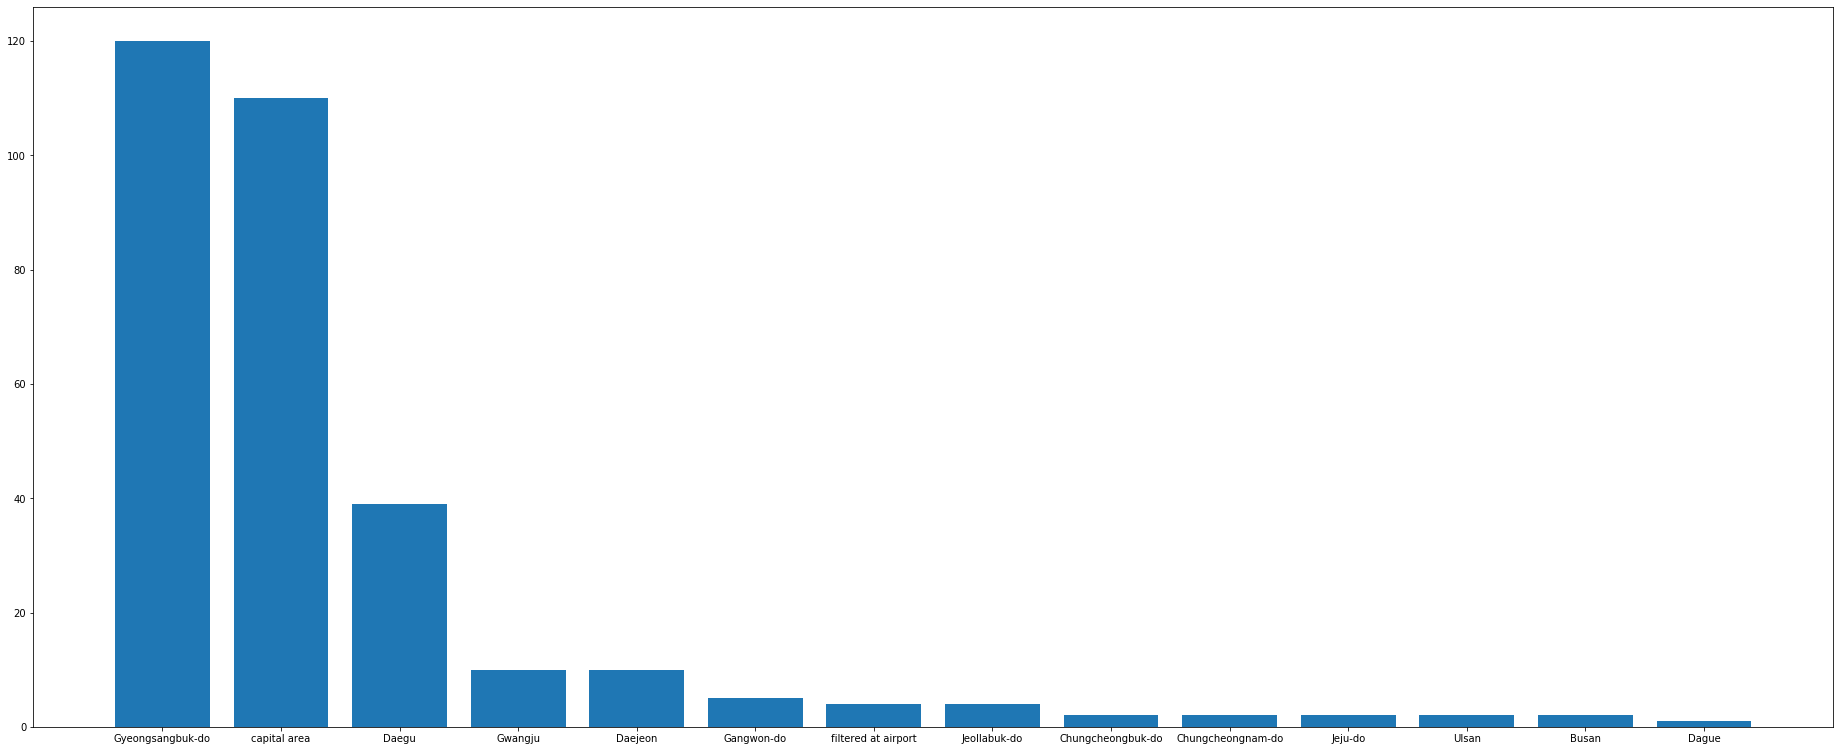

In [8]:
infection_reason=dataFrame['region'].value_counts()
print(infection_reason)
print('-------------------')
print(infection_reason.describe())
fig = plt.figure(figsize=(25, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(infection_reason.keys().to_list(),infection_reason.to_list())
plt.show()

2020-03-01    1062
2020-02-29     813
2020-03-02     600
2020-02-28     571
2020-02-27     505
2020-02-26     285
2020-02-24     231
2020-02-22     229
2020-02-23     169
2020-02-25     143
2020-02-21     100
2020-02-20      39
2020-02-19      26
2020-02-18       9
2020-02-05       5
2020-01-31       4
2020-02-02       3
2020-02-06       3
2020-02-09       3
2020-01-30       3
2020-02-16       2
2020-01-24       1
2020-02-04       1
2020-01-26       1
2020-01-27       1
2020-01-20       1
2020-02-01       1
2020-02-10       1
Name: confirmed_date, dtype: int64
-------------------
count      28.000000
mean      171.857143
std       282.272880
min         1.000000
25%         1.750000
50%         7.000000
75%       229.500000
max      1062.000000
Name: confirmed_date, dtype: float64


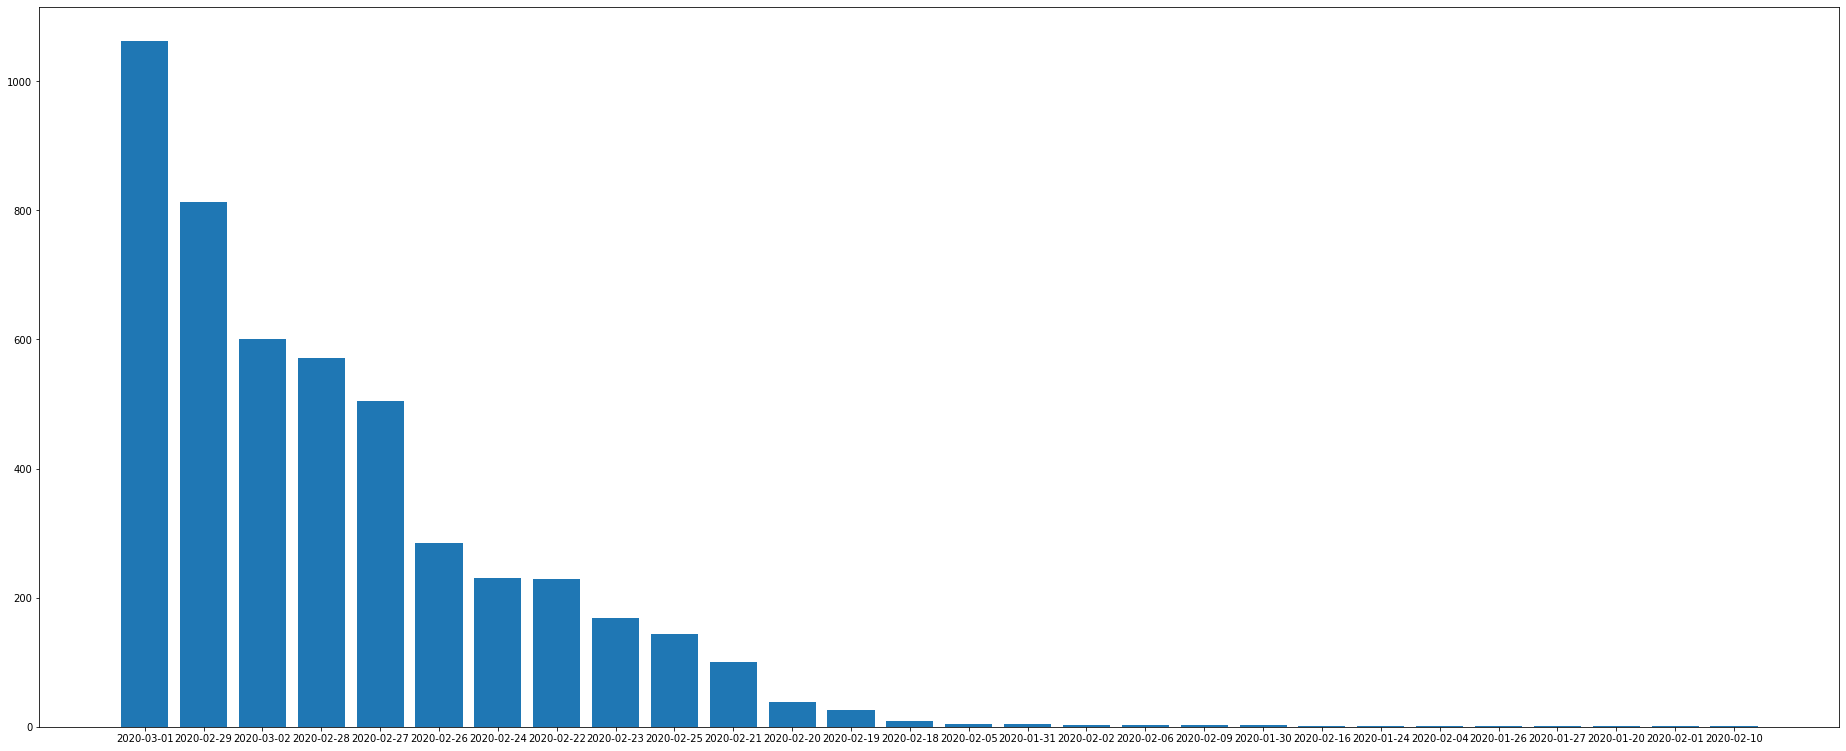

In [9]:
infection_reason=dataFrame['confirmed_date'].value_counts()
print(infection_reason)
print('-------------------')
print(infection_reason.describe())
fig = plt.figure(figsize=(25, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(infection_reason.keys().to_list(),infection_reason.to_list())
plt.show()

isolated    4764
released      28
deceased      20
Name: state, dtype: int64
-------------------
count       3.000000
mean     1604.000000
std      2736.643199
min        20.000000
25%        24.000000
50%        28.000000
75%      2396.000000
max      4764.000000
Name: state, dtype: float64


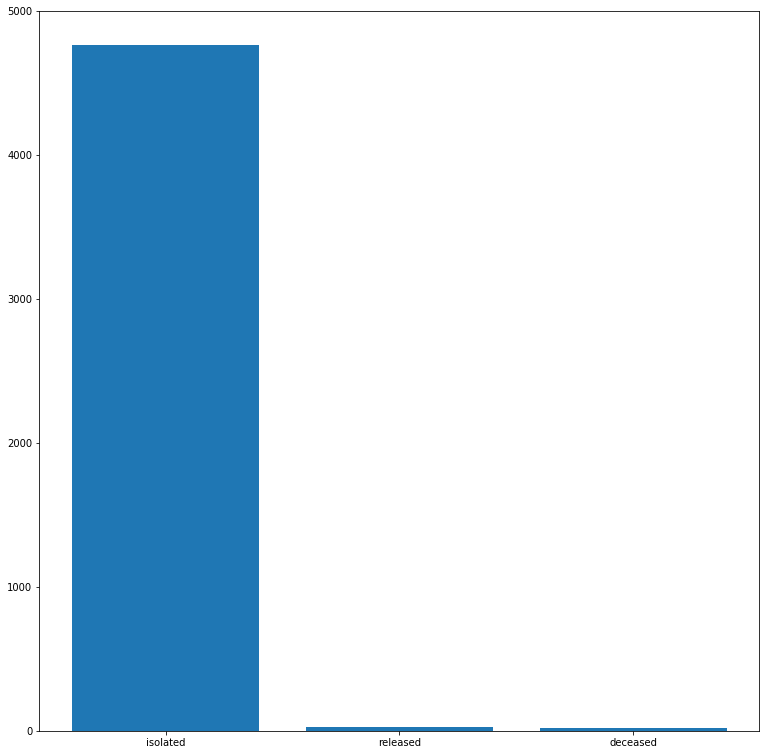

Deceased % : 0.41562759767248547


In [10]:
infection_reason=dataFrame['state'].value_counts()
print(infection_reason)
print('-------------------')
print(infection_reason.describe())
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0,0,1,1])
ax.bar(infection_reason.keys().to_list(),infection_reason.to_list())
plt.show()
print('Deceased % : '+ str(infection_reason['deceased']/len(dataFrame['state'])*100))

In [11]:
columns=dataFrame['infection_reason'].keys().to_list()
encode_infection_reason=pd.get_dummies(dataFrame['infection_reason'],columns=columns)

In [12]:
le = LabelEncoder()

In [13]:
encode_state=le.fit_transform(dataFrame['state'].values)
encode_state

array([2, 2, 2, ..., 1, 1, 1])

In [14]:
columns=dataFrame['sex'].keys().to_list()
encode_sex=pd.get_dummies(dataFrame['sex'],columns=columns)

In [15]:
columns=dataFrame['confirmed_date'].keys().to_list()
encode_confirmed_date=pd.get_dummies(dataFrame['confirmed_date'],columns=columns)

In [16]:
columns=dataFrame['released_date'].keys().to_list()
encode_released_date=pd.get_dummies(dataFrame['released_date'],columns=columns)

In [17]:
columns=dataFrame['deceased_date'].keys().to_list()
encode_deceased_date=pd.get_dummies(dataFrame['deceased_date'],columns=columns)

In [18]:
columns=dataFrame['region'].keys().to_list()
encode_region=pd.get_dummies(dataFrame['region'],columns=columns)

In [19]:
columns=dataFrame['group'].keys().to_list()
encode_group=pd.get_dummies(dataFrame['group'],columns=columns)

In [20]:
columns=dataFrame['country'].keys().to_list()
encode_country=pd.get_dummies(dataFrame['country'],columns=columns)

In [21]:
frames=[encode_country,encode_sex,encode_group,encode_region,encode_confirmed_date,encode_released_date,encode_deceased_date,encode_infection_reason]

In [22]:
keys=[]
for i in frames:
    keys+=i.keys().to_list()

In [24]:
finalDataFrame = pd.concat(frames,sort=False,ignore_index=False,axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(finalDataFrame.values, encode_state, test_size=0.33, random_state=1)

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512,activation='relu',input_shape=(90,)))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(X_train,y_train,epochs=20,batch_size=20,validation_split=0.3,verbose=1)

Train on 2256 samples, validate on 968 samples
Epoch 1/20
2256/2256 [==============================] - 1s 635us/sample - loss: 0.0213 - accuracy: 0.9805 - val_loss: -0.1076 - val_accuracy: 0.9938
Epoch 2/20
2256/2256 [==============================] - 1s 233us/sample - loss: -1.4962 - accuracy: 0.9894 - val_loss: -3.6224 - val_accuracy: 0.9938
Epoch 3/20
2256/2256 [==============================] - 1s 229us/sample - loss: -43.0071 - accuracy: 0.9894 - val_loss: -110.5088 - val_accuracy: 0.9938
Epoch 4/20
2256/2256 [==============================] - 1s 229us/sample - loss: -495.6495 - accuracy: 0.9911 - val_loss: -878.6608 - val_accuracy: 0.9938
Epoch 5/20
2256/2256 [==============================] - 1s 228us/sample - loss: -2677.3642 - accuracy: 0.9902 - val_loss: -3563.7168 - val_accuracy: 0.9948
Epoch 6/20
2256/2256 [==============================] - 1s 229us/sample - loss: -10736.5852 - accuracy: 0.9916 - val_loss: -12058.9801 - val_accuracy: 0.9948
Epoch 7/20
2256/2256 [===========

In [28]:
model.evaluate(X_test,y_test,verbose=0)

[-10910939.630667506, 0.9892947]

In [30]:
y_predicct=model.predict(finalDataFrame.values)

In [37]:
c_m=confusion_matrix(encode_state,y_predicct)

In [39]:
con_mat = tf.math.confusion_matrix(labels=encode_state, predictions=y_predicct).numpy()

In [66]:
classes=list(dataFrame['state'].unique())
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

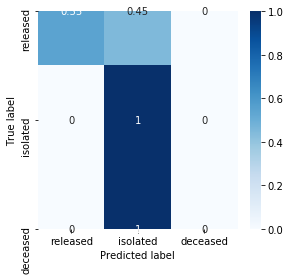

In [69]:
figure = plt.figure(figsize=(4, 4))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()